In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

In [1]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from collections import defaultdict
from sklearn import preprocessing
from keras.utils.training_utils import multi_gpu_model
import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


In [5]:
startTime = datetime.now()
data = pd.read_csv(r'/home/pbojja200/CPX/service_1221_1mn.txt', sep = '|')
print (datetime.now() - startTime)

/opt/cloudera/parcels/Anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (467,468,469,470,471,472,473,474,475,476,477,478,576,582,583,584,585,586,587,594,595,596,597,598,599,600,602,604,605,606,607,608,610,611,612,614,616,617,618,622,624,630,631,632,633,634,635,636,640,642,643,644,645,646,647,648,652,654,658,666,670,672,676,684,688,690,694,702,706,714,720,732,738,739,740,741,742,743,756,768,769,770,772,773,859,951) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:15:07.439952


In [6]:
data.columns = [i[1] for i in data.columns.str.split('.')]
data.tail()

,account,customer_account_id,call_billing_count,call_svc_count,call_sales_count,call_retention_count,call_sik_count,call_other_count,call_total_talktime,call_total_holdtime,...,call_transffered_count_21_30d,call_agent_handled_count_7_14d,call_agent_handled_count_14_21d,call_agent_handled_count_21_30d,ivr_total_call_count_7_14d,ivr_total_call_count_14_21d,ivr_total_call_count_21_30d,avg_calls_per_month,avg_ivr_per_month,freq_call_ind
7454944,8993212500226397,1406102,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0
7454945,8993212690031672,27834652,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0
7454946,8993212770202656,512454483,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.066667,0.0,0
7454947,8993212990228622,70716366,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0
7454948,8993213010077346,133131926,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0


In [7]:
df = data.sample(n=2000000, random_state = 4567)

In [8]:
var_drop = ['account','customer_account_id']
def data_prep(df, var_drop):
    
    num = df.select_dtypes(include=['float64','int64']).columns
    cat = df.select_dtypes(include=['O']).columns
    print ("Num columns : ", len(num))
    print ("Cat columns : ", len(cat))
    
    #cat_var = [x for x in list(cat) if x in var_drop or x.startswith("chat_") or x.startswith("sub_") ]
    cat_var = [x for x in list(cat) if x in var_drop ]
    num_var = [x for x in list(num) if x in var_drop ]
    
    num_var = num.drop(num_var)
    cat_var = cat.drop(cat_var)
    
    num_df = df[num_var].fillna(0)
    cat_df = df[cat_var].fillna('NA').replace(' ','NA').apply(lambda x: x.astype(str).str.upper())

    return num_df, cat_df, num_var, cat_var

num_df, cat_df, num_var, cat_var = data_prep(df, var_drop)
print (cat_var)
print ("New num cols : ", len(num_var))
print ("New cat cols : ", len(cat_var))
print ("Total new cols : ", len(num_var) + len(cat_var))

('Num columns : ', 996)
('Cat columns : ', 174)
Index([u'ivr_billing_end_status', u'ivr_billing_end_status_180d',
       u'ivr_billing_end_status_30d', u'ivr_billing_end_status_365d',
       u'ivr_billing_end_status_7d', u'ivr_billing_end_status_90d',
       u'ivr_billing_lob', u'ivr_billing_lob_180d', u'ivr_billing_lob_30d',
       u'ivr_billing_lob_365d',
       ...
       u'ivr_svc_xh_end_status', u'ivr_svc_xh_end_status_180d',
       u'ivr_svc_xh_end_status_30d', u'ivr_svc_xh_end_status_365d',
       u'ivr_svc_xh_end_status_7d', u'ivr_svc_xh_end_status_90d',
       u'call_agent_skill', u'call_sik_lob', u'tts_src_name',
       u'tts_historic_src_name'],
      dtype='object', length=174)
('New num cols : ', 994)
('New cat cols : ', 174)
('Total new cols : ', 1168)


In [9]:
def encoder(df, var_list):
    
    m = defaultdict(preprocessing.LabelEncoder)
    enc_res = df[var_list].fillna('NA').replace(' ','NA').apply(lambda x: x.astype(str).str.upper()).apply(lambda x: m[x.name].fit_transform(x))
    enc_res.columns = [str(x) +'_LE' for x in enc_res.columns]
    
    return enc_res, m

enc_res, enc_map = encoder(cat_df, cat_var)

# concatenating numerical data, encoded data to form final dataset
final_data = pd.concat([num_df, enc_res], axis = 1)
#final_data = num_df
print (final_data.shape)
final_data.head()

(2000000, 1168)


,call_billing_count,call_svc_count,call_sales_count,call_retention_count,call_sik_count,call_other_count,call_total_talktime,call_total_holdtime,call_total_handle_time,call_total_wrap_time,...,ivr_svc_xh_end_status_LE,ivr_svc_xh_end_status_180d_LE,ivr_svc_xh_end_status_30d_LE,ivr_svc_xh_end_status_365d_LE,ivr_svc_xh_end_status_7d_LE,ivr_svc_xh_end_status_90d_LE,call_agent_skill_LE,call_sik_lob_LE,tts_src_name_LE,tts_historic_src_name_LE
6779450,0,0,0,0,0,0,0,0,0,0,...,13,707,112,1349,46,316,0,0,0,0
3186163,0,0,0,0,0,0,0,0,0,0,...,13,707,112,1349,46,316,0,0,0,0
4210636,0,0,0,0,0,0,0,0,0,0,...,13,707,112,1349,46,316,0,0,0,0
4313863,0,0,0,0,0,0,0,0,0,0,...,13,707,112,1349,46,316,0,0,0,0
1222761,0,0,0,0,0,0,0,0,0,0,...,13,707,112,1349,46,316,0,0,0,0


In [10]:
X_train = final_data.sample(1000000)
dn = final_data[~(final_data.index.isin(X_train.index))]
X_test = dn.sample(500000)

In [11]:
X_train.shape, X_test.shape

((1000000, 1168), (500000, 1168))

In [12]:
# this is the size of our encoded representations
encoding_dim = 50
input_dim = 1168

In [13]:
# this is our input placeholder
input_img = Input(shape=(input_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='relu')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# this model maps an input to its reconstruction
# create the autoencoder model
autoencoder = Model(input_img, decoded)

In [15]:
# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [16]:
# this model maps an input to its encoded representation
# create the encoder model
encoder = Model(input_img, encoded)

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [33]:
# complie the model
autoencoder  = multi_gpu_model(autoencoder , gpus=2)
#autoencoder.compile(loss='mean_squared_error', optimizer='rmsprop')
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [34]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1168)         0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 1168)         0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 1168)         0           input_1[0][0]                    
__________________________________________________________________________________________________
model_4 (Model)                 (None, 1168)         118018      lambda_3[0][0]                   
                                                                 lambda_4[0][0]                   
__________

In [35]:
# train autoencoder
history = autoencoder.fit(X_train, X_train, epochs = 10, batch_size = 10000*2, shuffle = False, validation_data = (X_test, X_test))

Train on 1000000 samples, validate on 500000 samples
Epoch 1/10
1000000/1000000 [==============================] - 25s 25us/step - loss: -2442328.2050 - val_loss: -2452653.8700

In [36]:
len(encoder.get_weights()[1])

50

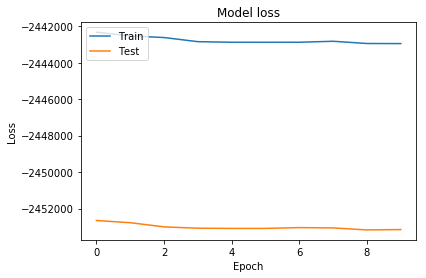

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
predictions_tr = autoencoder.predict(X_train)
mse_tr = np.mean(np.power(X_train - predictions_tr, 2), axis=1)

predictions_tt = autoencoder.predict(X_test)
mse_tt = np.mean(np.power(X_test - predictions_tt, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error_tr': mse_tr,'reconstruction_error_tt': mse_tt})
error_df.describe()

In [ ]:
t = pd.DataFrame(predictions_tr)
t.describe()